# Code to use and work with c302

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re

In [21]:
%pwd

'/Users/manuel/openworm_tools'

In [23]:
#%cd c302/

In [24]:
# To clear output - Press 'ESC' + 'R' + 'Y' + 'Enter'
# !./fast_run_1 FWandBW_tries

## Functions

**Read Data -** Creates an array without the first column (time values) 

**Prepare Array -** Changes the array so that it can be represented in a given number of time measures 

**Plot Data -** Makes a plot using the data given, the legend introduced and the title of the graph

**Find Cells -** Obtains the names of the cells from the LEMS file to use for the legend


In [25]:
def read_data(filename):
    with open(filename) as f:
        line = f.readline()
    col = len(line.split())
    array = np.loadtxt(filename, usecols=range(0,col))
    #array = np.delete(array, 0, 1) #delete first column (time)
    #array = np.delete(array, 0, 0) #delete first row (t=0)
    #array[a,b] = element in row a+1, in column b+1 
    #print(array[0,0])
    return array

In [26]:
def prepare_array(arr_in, time_measures):
    # The array that comes in 
    # Has for x the number of neurons/muscles
    # Has for y the time intervales
    y, x = arr_in.shape
    #print("Number of muscles/neurons: %d" %(x))
    #print("Number of time measures: %d" %(y))
    value = np.floor(y/time_measures)
    value = value.astype(int)
    #print(value)
    arr = np.zeros((time_measures, x))
    #print(arr)
    for i in range(0, time_measures):
        number_to_delete = value - 1
        #print(i*number_to_delete)
        arr[i] = arr_in[i*number_to_delete]
        #print(arr)
        
    
    arr_out = arr
    #arr_out = np.transpose(arr) #Swap axis
    #x axis is time
    #y axis is muscles/neurons
    x, y = arr_out.shape
    #print("Number of time measures: %d" %(x))
    #print("Number of muscles/neurons: %d" %(y))
    return arr_out

In [27]:
def find_cells():
    text = open(LEMS, "r")
    count = 0
    s = []
    for j in text:
        s.append(j)
        count = count + 1
    
    def search(word, sentences):
        return [i for i in sentences if re.search(r'\b%s\b' % word, i)]
    strings = search('Cells', s) #Find all the lines in the LEMS file with the word Cells
    
    for i in strings:
        if re.search(r'.*Cells:.*', i):
            cells_str = i
    #print(cells_str) #cells_str is the line with the cells of the simulation of the LEMS file


    parts = re.split('[\']',cells_str)
    #print(len(parts))
    cells = [] #List of cells in the LEMS file
    if len(parts) <3:
        print('No cells in this file')
    else:
        for i in range(len(parts)):
            if (i % 2) != 0:
                cells.append(parts[i])
    #print(cells)
    text.close()
    cells.sort()
    return cells


In [55]:
#def plot_data(data, labels, title):
def plot_data(data, labels, title):
    fig = plt.figure(figsize=(12, 6)) #width and heigth
    #'''
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('time (s)')
    #ax.set(ylim=(-0.075, 0.025))
    #'''
    '''
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.set_title(title)
    ax3.set_xlabel('time (s)')
    ax1.set(ylim=(-0.12, 0.015))
    ax2.set(ylim=(-0.12, 0.015))
    #ax3.set(ylim=(-0.12, 0.015))
    #'''
    #ax.legend(labels)
    data = np.transpose(data)

    #list = [1, 3, 5, 7, 9, 11, 13, 14]
    list1 = [6, 8]
    list2 = [5, 7]
    list3 = 1
    
    '''
    time = data[0].tolist()
    for i in list1:
        value = data[i].tolist()
        cell = labels[i-1]
        ax1.plot(time, value, label = cell)
    leg = ax1.legend()
    
    for i in list2:
        value = data[i].tolist()
        cell = labels[i-1]
        ax2.plot(time, value, label = cell)
    leg = ax2.legend()
    #'''
    
    '''
    value = data[list3].tolist()
    cell = labels[list3-1]
    ax3.plot(time, value, label = cell)
    leg = ax3.legend()
    #'''
    
    #'''
    time = data[0].tolist()
    for i in range(len(labels)):
        value = data[i+1].tolist()
        cell = labels[i]
        ax.plot(time, value, label = cell)
    leg = ax.legend()
    #'''
    

In [122]:
def plot_three_data(data, labels, title, first_index, second_index, third_index):
    fig = plt.figure(figsize=(12, 6)) #width and heigth
    #'''
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.set_title(title)
    ax3.set_xlabel('time (s)')
    ax1.set(ylim=(-0.12, 0.015))
    ax2.set(ylim=(-0.12, 0.015))
    #ax3.set(ylim=(-0.12, 0.015))
    #'''
    #ax.legend(labels)
    data = np.transpose(data)

    
    #'''
    time = data[0].tolist()
    
    for i in first_index:
        value = data[i+1].tolist()
        cell = labels[i]
        ax1.plot(time, value, label = cell)
    leg = ax1.legend()
    
    for i in second_index:
        value = data[i+1].tolist()
        cell = labels[i]
        ax2.plot(time, value, label = cell)
    leg = ax2.legend()
    
    for i in third_index:
        value = data[i+1].tolist()
        cell = labels[i]
        ax3.plot(time, value, label = cell)
    leg = ax3.legend()
    #'''

In [99]:
def movement_plot(arrayName):
    fig = plt.figure(figsize=(8, 3.2)) #width and heigth

    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(arrayName)
    #ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()

## Insert reference for file

In [141]:
reference = 'FW' #Change the name here
parameters = 'C2'
include_neurons = True
include_muscles = False
movement = True
isNeuronSimulation = True #Can be done with NEURON or PyNeuroML


In [142]:
file_start = 'c302_' + parameters + '_' + reference
if isNeuronSimulation:
    path_to_file = 'simulation_data/' + file_start + '_nrn/'
else: 
    path_to_file = 'simulation_data/' + file_start + '/'
neuron_voltage =  path_to_file + file_start + '.dat'
neuron_activity = path_to_file + file_start + '.activity.dat'
muscle_voltage = path_to_file + file_start + '.muscles.dat'
muscle_activity = path_to_file + file_start + '.muscles.activity.dat'
LEMS = path_to_file +'LEMS_c302_' + parameters + '_' + reference + '.xml'
print(neuron_voltage)

simulation_data/c302_C2_FW_nrn/c302_C2_FW.dat


In [150]:
if include_neurons:
    H_1 = prepare_array(read_data(neuron_voltage), 500)
    H_2 = prepare_array(read_data(neuron_activity), 500)
    cells = find_cells()
    if (len(np.transpose(H_1)) != (len(cells) + 1)):
        print('ERROR: There is a mismatch in the number of data and cells')
    print('Neurons: ')
    print(cells)
else:
    print ('No neurons in this simulation')
if include_muscles:
    H_3 = prepare_array(read_data(muscle_voltage), 100)
    plot_data(H_3)
    H_4 = prepare_array(read_data(muscle_activity), 100)
    plot_data(H_4)
else: 
    print('No muscles in this simulation')

Neurons: 
['AVBL', 'AVBR', 'DB1', 'DB2', 'DB3', 'DD1', 'DD2', 'DD3', 'VB1', 'VB2', 'VB3', 'VD1', 'VD2', 'VD3']
No muscles in this simulation


## Script

Neurons: 
['AVBL', 'AVBR', 'DB1', 'DB2', 'DB3', 'DD1', 'DD2', 'DD3', 'VB1', 'VB2', 'VB3', 'VD1', 'VD2', 'VD3']
Do you want to plot all neurons? [Y/n]Y


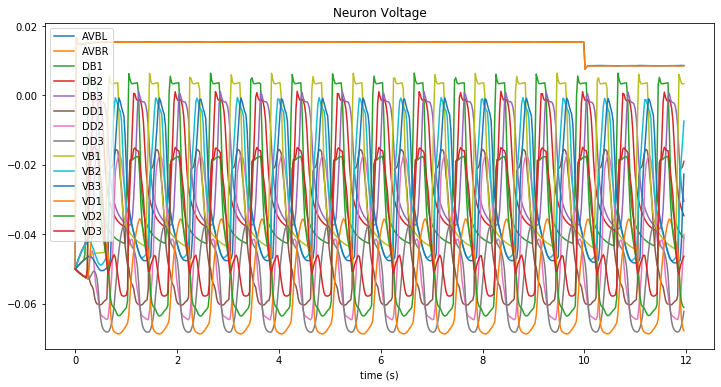

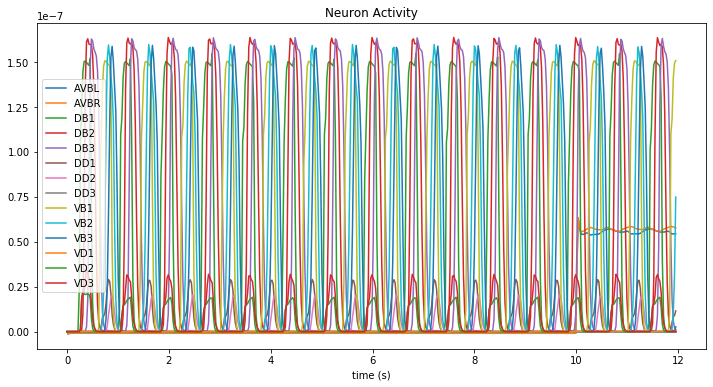

In [149]:
if include_neurons:
    print('Neurons: ')
    print(cells)
    Q1 = input('Do you want to plot all neurons? [Y/n]')
    if Q1 == 'Y':
        plotAll = True
    elif Q1 == 'n':
        plotAll = False
    else: 
        print('Please respond [Y/n]')
    
    if plotAll:
        data_1 = H_1
        data_2 = H_2
        legend = cells
    else:
        
        transp_data_1 = np.transpose(H_1)[0]
        transp_data_2 = np.transpose(H_2)[0]
        
        insertNeurons = True
        cells2 = []
        while insertNeurons:
            Q2 = input('Insert name of one neuron: (q to quit)')
            if Q2 == 'q':
                insertNeurons = False
            elif Q2 in cells:
                cells2.append(Q2)
            else:
                print('Error: Neuron not found in this simulation!')
        
        cells2 = list(set(cells2)) # Delete possible duplicates
        cells2.sort() # Alphabetical order
        
        for i in range(len(cells)):
            if cells[i] in cells2:
                transp_data_1 = np.vstack((transp_data_1, np.transpose(H_1)[i+1]))
                transp_data_2 = np.vstack((transp_data_2, np.transpose(H_2)[i+1]))
        data_1 = np.transpose(transp_data_1)
        data_2 = np.transpose(transp_data_2)
        legend = cells2
        
    #plot_data(data, legend, title, xlabel, ylabel, ylimits)
    plot_data(data_1, legend, 'Neuron Voltage')
    plot_data(data_2, legend, 'Neuron Activity')
else:
    print('No neurons to plot')

Neurons: 
['AVBL', 'AVBR', 'DB1', 'DB2', 'DB3', 'DD1', 'DD2', 'DD3', 'VB1', 'VB2', 'VB3', 'VD1', 'VD2', 'VD3']
[2, 8]
[3, 9]
[4, 10]


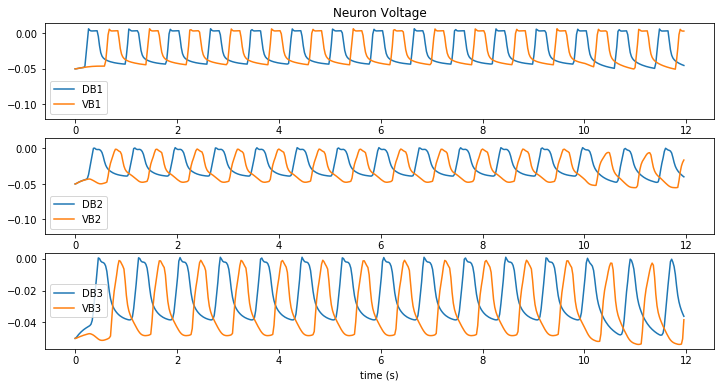

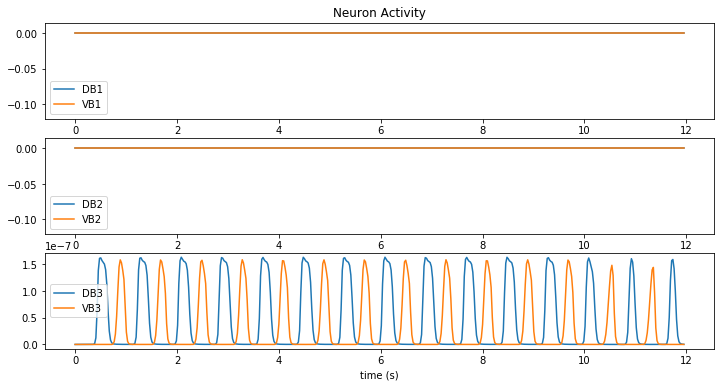

In [151]:
if include_neurons:
    print('Neurons: ')
    print(cells)
    
    data_1 = H_1
    data_2 = H_2
    legend = cells
    
    #################
    # CELLS TO PLOT #
    #################
    
    '''
    first_cells = ['DA1', 'VA1']
    second_cells = ['DA2', 'VA2']
    third_cells = ['DA3', 'VA3']
    #'''
    
    #'''
    first_cells = ['DB1', 'VB1']
    second_cells = ['DB2', 'VB2']
    third_cells = ['DB3', 'VB3']
    #'''
    count = 0
    first_index = []
    second_index = []
    third_index = []
    for i in range(len(cells)):
        if cells[i] in first_cells:
            first_index.append(i)
        elif cells[i] in second_cells:
            second_index.append(i)
        elif cells[i] in third_cells:
            third_index.append(i)
        count = count+1
    
    print(first_index)
    print(second_index)
    print(third_index)
        
    #plot_data(data, legend, title, xlabel, ylabel, ylimits)
    plot_three_data(data_1, legend, 'Neuron Voltage', first_index, second_index, third_index)
    plot_three_data(data_2, legend, 'Neuron Activity', first_index, second_index, third_index)
else:
    print('No neurons to plot')

In [97]:
A = []
A.append(2)
A.append(3)
print (A)
B = [5, 9]
print (B)
C = np.array([A, B])
print(C[0,:])

[2, 3]
[5, 9]
[2 3]


In [106]:
if include_muscles: 
    H_3 = prepare_array(read_data(muscle_voltage), 100)
    plot_data(H_3)
    H_4 = prepare_array(read_data(muscle_activity), 100)
    plot_data(H_4)
else:
    print('No muscles to plot')

No muscles to plot


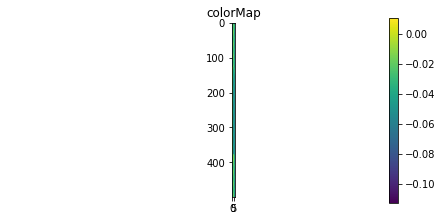

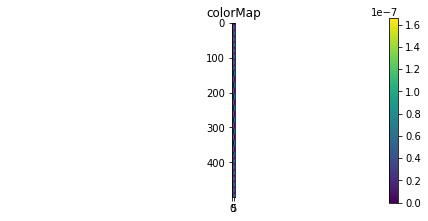

In [107]:
if movement:
    H_1 = read_data(neuron_voltage)
    H_2 = read_data(neuron_activity)
    H_1 = np.delete(H_1,0,1) #Delete time column
    H_2 = np.delete(H_2,0,1)
    H_1 = prepare_array(H_1, 500)
    H_2 = prepare_array(H_2, 500)
    movement_plot(H_1)
    movement_plot(H_2)
    
else:
    print('No movement plot')